In [1]:
#import libraires 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Import  data

https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data

In [4]:
#read data
df = pd.read_csv(r"C:\Users\frida\Downloads\StudentPerformanceFactors.csv")
df.head(2)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61


### 2. Explore data 



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.describe().round(2)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.00,6607.00,6607.00,6607.00,6607.00,6607.00,6607.00
mean,19.98,79.98,7.03,75.07,1.49,2.97,67.24
std,5.99,11.55,1.47,14.40,1.23,1.03,3.89
min,1.00,60.00,4.00,50.00,0.00,0.00,55.00
25%,16.00,70.00,6.00,63.00,1.00,2.00,65.00
50%,20.00,80.00,7.00,75.00,1.00,3.00,67.00
75%,24.00,90.00,8.00,88.00,2.00,4.00,69.00
max,44.00,100.00,10.00,100.00,8.00,6.00,101.00


### 3. Missing Values, Duplicates, and Standardization of Column Names 

In [9]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [10]:
# check columns with missing values

print(df["Teacher_Quality"].value_counts())            
print(df["Parental_Education_Level"].value_counts())
print(df["Distance_from_Home"].value_counts())         

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64
Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64


In [11]:
# Modes for each column
mode_teacher_quality = df["Teacher_Quality"].mode()
print("Mode Teacher Quality:", mode_teacher_quality)

mode_parent_ed = df["Parental_Education_Level"].mode()
print("Mode Parental Education Level:", mode_parent_ed)

mode_distance_home = df["Distance_from_Home"].mode()
print("Mode Distance from Home:", mode_distance_home)

Mode Teacher Quality: 0    Medium
Name: Teacher_Quality, dtype: object
Mode Parental Education Level: 0    High School
Name: Parental_Education_Level, dtype: object
Mode Distance from Home: 0    Near
Name: Distance_from_Home, dtype: object


In [12]:
# Fill missing values in the "Teacher_Quality" column with its mode
df["Teacher_Quality"] = df["Teacher_Quality"].fillna(mode_teacher_quality[0])

# Fill missing values in the "Parental_Education_Level" column with its mode
df["Parental_Education_Level"] = df["Parental_Education_Level"].fillna(mode_parent_ed[0])

# Fill missing values in the "Distance_from_Home" column with its mode
df["Distance_from_Home"] = df["Distance_from_Home"].fillna(mode_distance_home[0])

df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [13]:
df.head(2)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61


In [14]:
# Check for duplicates
df.duplicated().sum()

0

In [15]:
#capitalize the first letter of each column name and convert all other letters to lowercase
df.rename(columns = lambda x: x.capitalize(), inplace = True)
df.head(1)

,Hours_studied,Attendance,Parental_involvement,Access_to_resources,Extracurricular_activities,Sleep_hours,Previous_scores,Motivation_level,Internet_access,Tutoring_sessions,Family_income,Teacher_quality,School_type,Peer_influence,Physical_activity,Learning_disabilities,Parental_education_level,Distance_from_home,Gender,Exam_score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67


### 4. Normality and Outlier check

In [17]:
#Check normality using the Shapiro-Wilko Method
#If the p-value from the test is below a 0.05, you reject the null hypothesis, indicating that the data is not normally distributed.

from scipy.stats import shapiro
columns_normality = ["Hours_studied", "Attendance", "Sleep_hours","Previous_scores", "Exam_score"]

# Apply Shapiro-Wilk test to each column and extract p-values
normality_results = df[columns_normality].apply(lambda x: shapiro(x)[1])

# Convert results to DataFrame for better visibility
normality_results =pd.DataFrame(normality_results, columns = ["p-value"]).round(3)
normality_results

C:\Users\frida\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)


,p-value
Hours_studied,0.0
Attendance,0.0
Sleep_hours,0.0
Previous_scores,0.0
Exam_score,0.0


For large sample sizes (N > 5000), the computed p-value in the Shapiro-Wilk test may not be accurate.   
For larger datasets, the Anderson-Darling test is recommended for testing normality.
if the test statistic is greater than the critical value for a given significance level, we reject the null hypothesis of normality.   
>for all variables (Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, and Exam_Score), the Anderson-Darling test statistic is significantly higher than the critical value at even the most conservative significance level of 1%, meaning that none of these variables follow a normal distribution.

In [19]:
import scipy.stats as stats

columns_normality = ["Hours_studied", "Attendance", "Sleep_hours", "Previous_scores", "Exam_score"]

# Loop through each column and perform Anderson-Darling test for normality
for column in columns_normality:
    result = stats.anderson(df[column], dist="norm")
    
    print(f"Anderson-Darling test result for {column}:")
    print("Statistic:", result.statistic)
    print("Critical values:", result.critical_values)
    print("Significance levels:", result.significance_level)
    print()


Anderson-Darling test result for Hours_studied:
Statistic: 7.502903459651861
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Anderson-Darling test result for Attendance:
Statistic: 74.53201561707738
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Anderson-Darling test result for Sleep_hours:
Statistic: 124.92077470714685
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Anderson-Darling test result for Previous_scores:
Statistic: 72.78603939224013
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Anderson-Darling test result for Exam_score:
Statistic: 51.25168473553367
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]



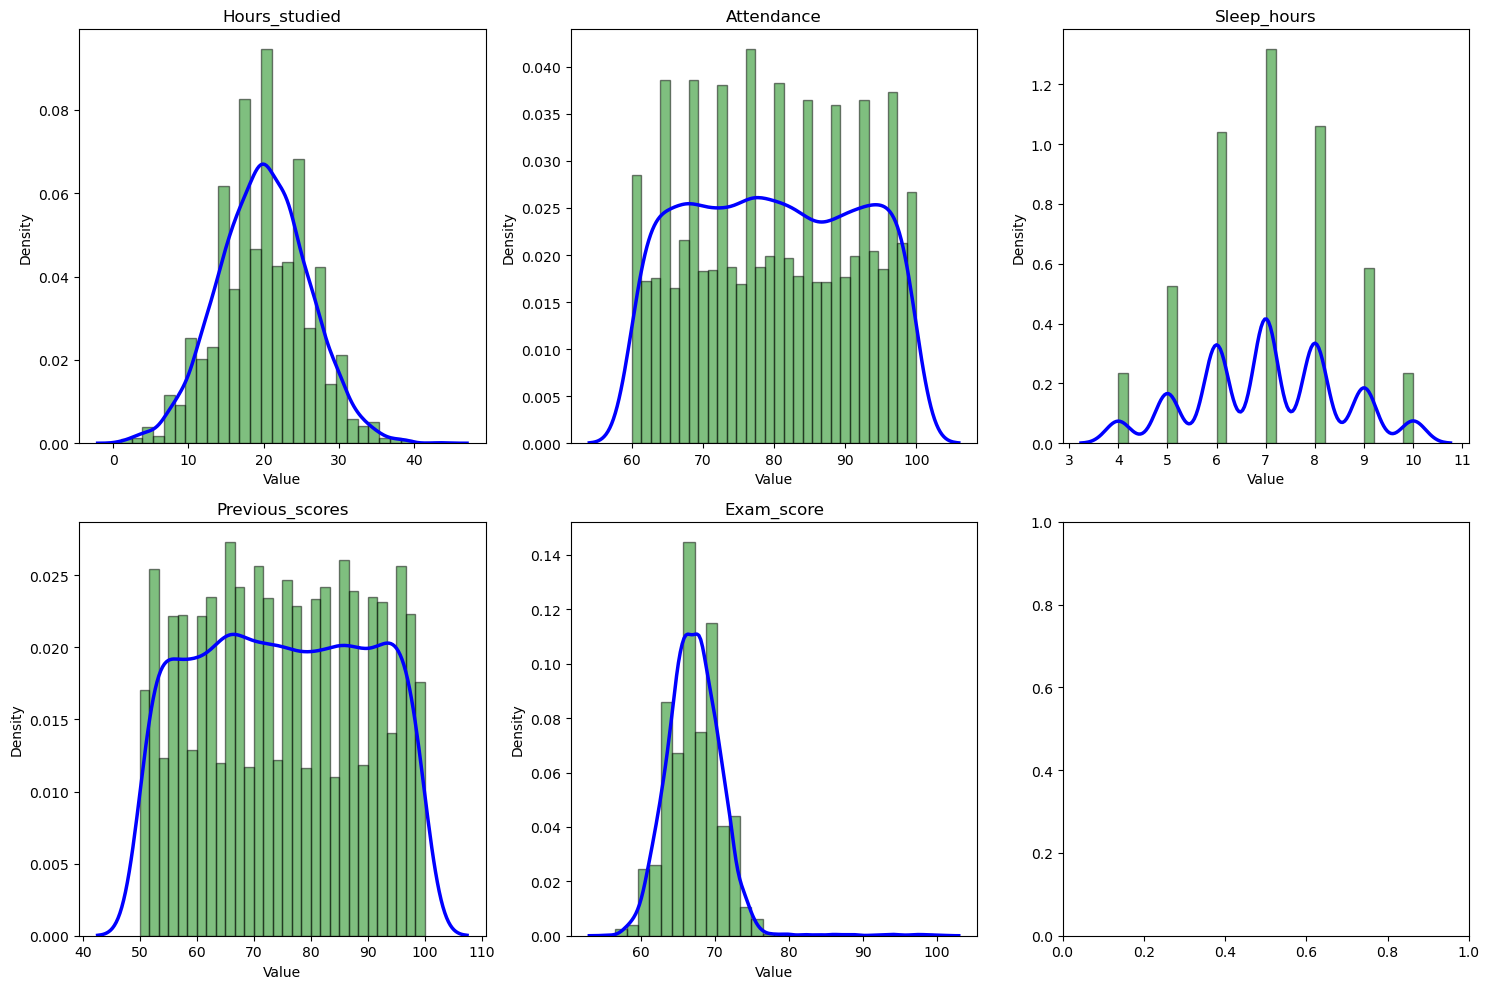

In [20]:
# When you want to create multiple histograms 
# List of columns to create histograms for
colums_to_plot = ["Hours_studied", "Attendance", "Sleep_hours", "Previous_scores", "Exam_score"]

# Create subplots based on the number of values in colums_to_plot

import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ["Hours_studied", "Attendance", "Sleep_hours", "Previous_scores", "Exam_score"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create histograms and overlay KDE for each column
for ax, col in zip(axes, columns_to_plot):
    if col in df.columns:
        # Plot the histogram with density normalization
        ax.hist(df[col], bins=30, alpha=0.5, color="green", edgecolor="black", density=True)
        
        # Overlay KDE (density curve)
        sns.kdeplot(df[col], ax=ax, color="blue", linewidth=2.5)
        
        ax.set_title(col)
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
    else:
        ax.set_title(f"{col} not found")
        ax.axis("off")

# Adjust layout to prevent overlap
plt.tight_layout()
save_path = r"C:\Users\frida\OneDrive\Documents\1_2024 Fall\CEP512 Topical Seminar in reserach method\Final_project\boxtox_before.png"
plt.savefig(save_path)
plt.show()


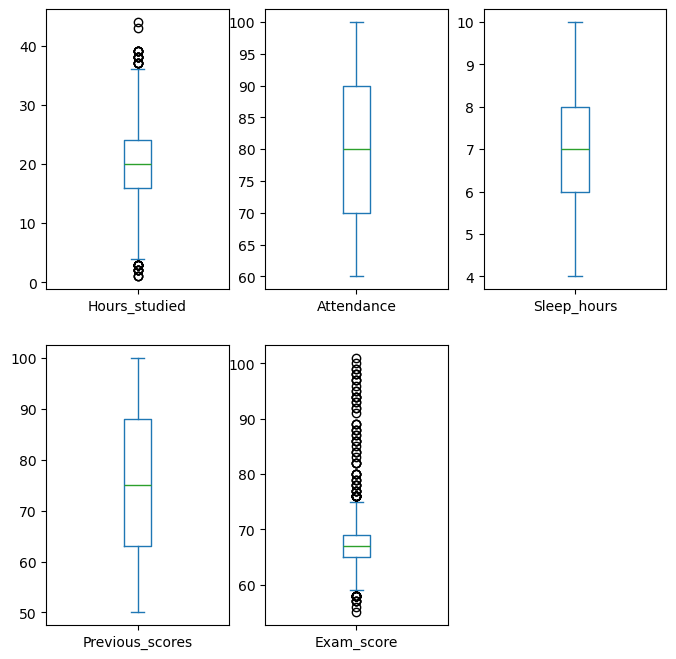

In [21]:
columns_to_plot = ["Hours_studied", "Attendance", "Sleep_hours", "Previous_scores", "Exam_score"]

df[columns_to_plot].plot(kind="box", subplots=True, layout=(2, 3), sharex=False, sharey=False, figsize=(8, 8))
plt.show()

In [22]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] 
    return df

In [23]:
# Apply the outlier removal to specified columns
outlier_cols = ["Hours_studied", "Attendance", "Sleep_hours", "Previous_scores", "Exam_score"]
data = remove_outliers(df, outlier_cols)
data.head(2)

,Hours_studied,Attendance,Parental_involvement,Access_to_resources,Extracurricular_activities,Sleep_hours,Previous_scores,Motivation_level,Internet_access,Tutoring_sessions,Family_income,Teacher_quality,School_type,Peer_influence,Physical_activity,Learning_disabilities,Parental_education_level,Distance_from_home,Gender,Exam_score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61


In [24]:
df2=data.copy()

In [25]:
columns_normality = ["Hours_studied", "Attendance", "Sleep_hours", "Previous_scores", "Exam_score"]

# Loop through each column and perform Anderson-Darling test for normality
for column in columns_normality:
    result = stats.anderson(df2[column], dist="norm")
    
    print(f"Anderson-Darling test result for {column}:")
    print("Statistic:", result.statistic)
    print("Critical values:", result.critical_values)
    print("Significance levels:", result.significance_level)
    print()

Anderson-Darling test result for Hours_studied:
Statistic: 8.21922677040584
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Anderson-Darling test result for Attendance:
Statistic: 71.57449361696581
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Anderson-Darling test result for Sleep_hours:
Statistic: 122.24917815596655
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Anderson-Darling test result for Previous_scores:
Statistic: 70.8036860203274
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Anderson-Darling test result for Exam_score:
Statistic: 26.865929763187523
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]



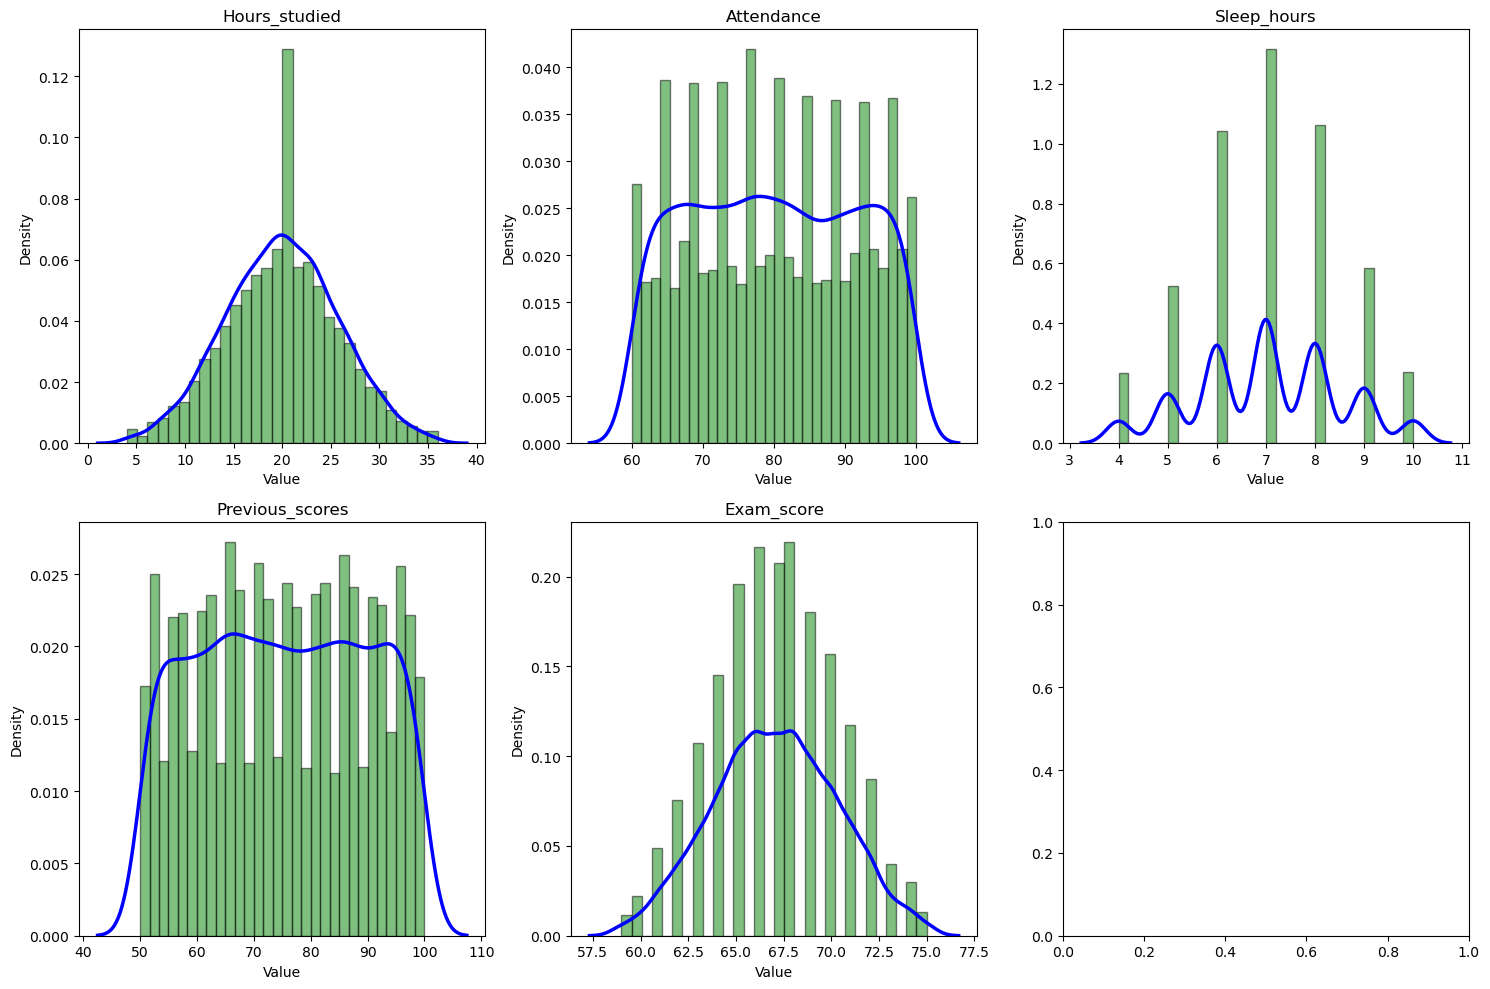

In [26]:
# Create subplots based on the number of values in colums_to_plot

import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ["Hours_studied", "Attendance", "Sleep_hours", "Previous_scores", "Exam_score"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create histograms and overlay KDE for each column
for ax, col in zip(axes, columns_to_plot):
    if col in data.columns:
        # Plot the histogram with density normalization
        ax.hist(df2[col], bins=30, alpha=0.5, color="green", edgecolor="black", density=True)
        
        # Overlay KDE (density curve)
        sns.kdeplot(df2[col], ax=ax, color="blue", linewidth=2.5)
        
        ax.set_title(col)
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
    else:
        ax.set_title(f"{col} not found")
        ax.axis("off")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



In [27]:
# IQR didn't work, so I will try the Box-Cox transformation to achieve normal distribution.

In [28]:
#check if all the values are positive

# List of columns to check
columns_to_check = ['Hours_studied', 'Attendance', 'Sleep_hours', 'Previous_scores', 'Exam_score']

# Check if all values in each column are positive
is_positive_all = (df2[columns_to_check] > 0).all()

# Print the result for each column
print(is_positive_all)


Hours_studied      True
Attendance         True
Sleep_hours        True
Previous_scores    True
Exam_score         True
dtype: bool


In [29]:
from scipy import stats

# List of columns to transform
columns_to_transform = ["Hours_studied", "Attendance", "Sleep_hours", "Previous_scores", "Exam_score"]

# Loop through the columns and apply Box-Cox transformation
for col in columns_to_transform:
    df2[col + "_boxcox"], fitted_lambda = stats.boxcox(df2[col])

df2.head(2)  

,Hours_studied,Attendance,Parental_involvement,Access_to_resources,Extracurricular_activities,Sleep_hours,Previous_scores,Motivation_level,Internet_access,Tutoring_sessions,...,Learning_disabilities,Parental_education_level,Distance_from_home,Gender,Exam_score,Hours_studied_boxcox,Attendance_boxcox,Sleep_hours_boxcox,Previous_scores_boxcox,Exam_score_boxcox
0,23,84,Low,High,No,7,73,Low,Yes,0,...,No,High School,Near,Male,67,20.374146,29.971858,5.791028,34.140668,53.103451
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,No,College,Moderate,Female,61,16.765520,24.554137,6.736213,28.776013,48.563104


In [30]:
columns_normality = ["Hours_studied_boxcox", "Attendance_boxcox", "Sleep_hours_boxcox", "Previous_scores_boxcox", "Exam_score_boxcox"]

# Loop through each column and perform Anderson-Darling test for normality
for column in columns_normality:
    result = stats.anderson(df2[column], dist="norm")
    
    print(f"Anderson-Darling test result for {column}:")
    print("Statistic:", result.statistic)
    print("Critical values:", result.critical_values)
    print("Significance levels:", result.significance_level)
    print()

Anderson-Darling test result for Hours_studied_boxcox:
Statistic: 8.254375739081297
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Anderson-Darling test result for Attendance_boxcox:
Statistic: 70.98213774775195
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Anderson-Darling test result for Sleep_hours_boxcox:
Statistic: 122.25528063772254
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Anderson-Darling test result for Previous_scores_boxcox:
Statistic: 70.56992092387645
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]

Anderson-Darling test result for Exam_score_boxcox:
Statistic: 26.852332146892877
Critical values: [0.576 0.656 0.787 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]



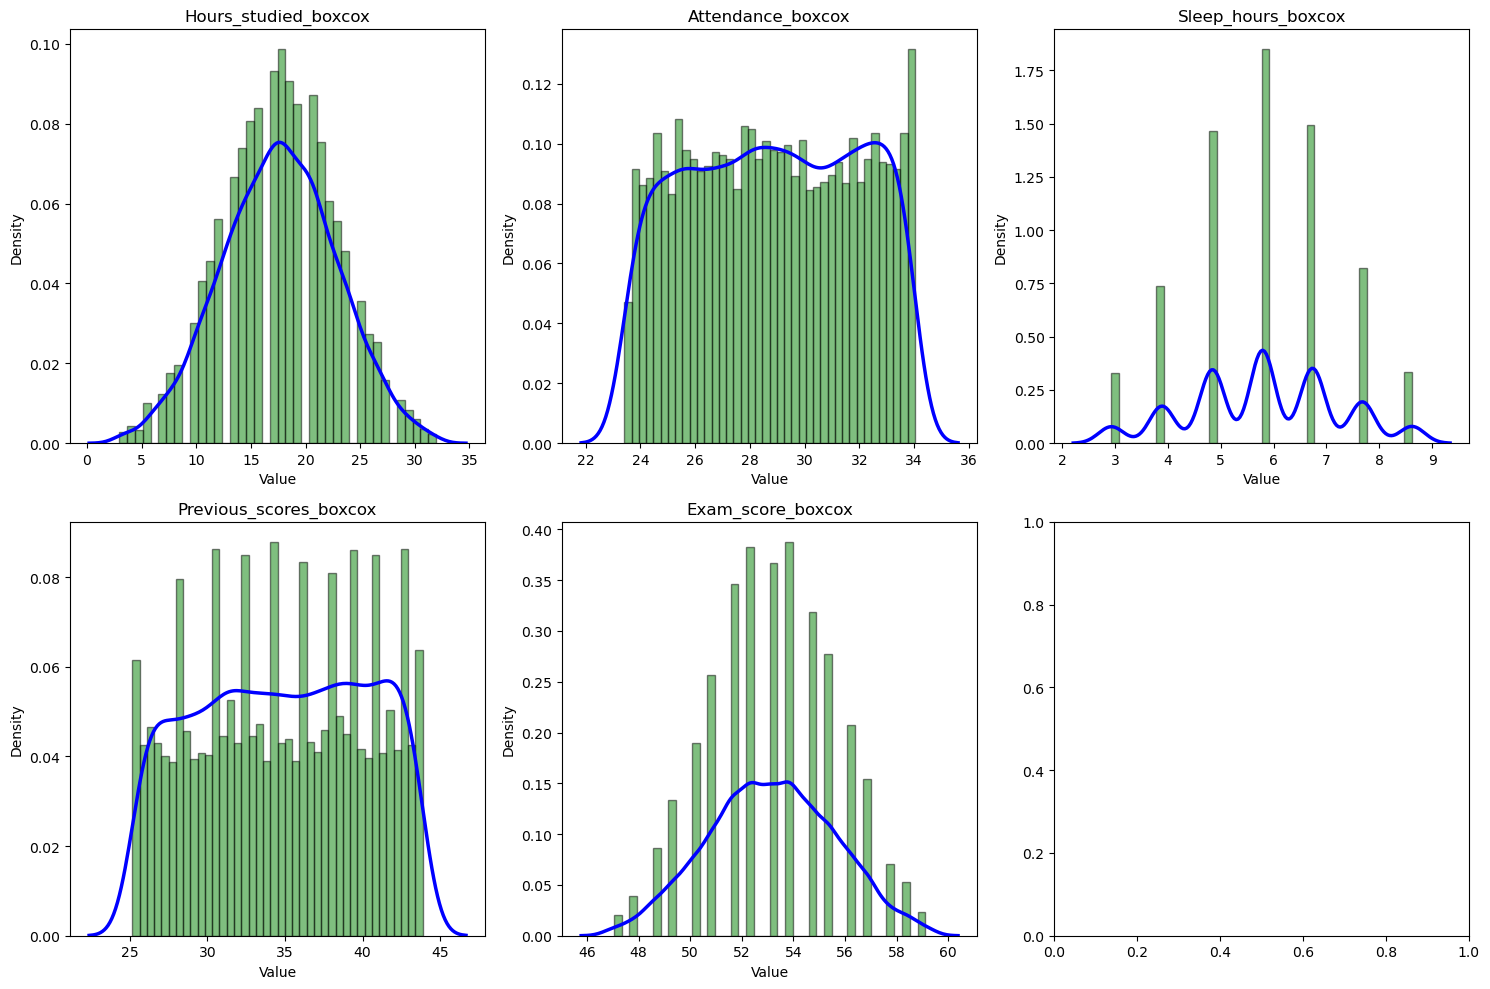

In [31]:
# Create subplots based on the number of values in colums_to_plot

import matplotlib.pyplot as plt
import seaborn as sns

boxcox_to_plot = ["Hours_studied_boxcox", "Attendance_boxcox", "Sleep_hours_boxcox", "Previous_scores_boxcox", "Exam_score_boxcox"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Create histograms and overlay KDE for each column
for ax, col in zip(axes, boxcox_to_plot):
    if col in df2.columns:
        # Plot the histogram with density normalization
        ax.hist(df2[col], bins=40, alpha=0.5, color="green", edgecolor="black", density=True)
        
        # Overlay KDE (density curve)
        sns.kdeplot(df2[col], ax=ax, color="blue", linewidth=2.5)
        
        ax.set_title(col)
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
    else:
        ax.set_title(f"{col} not found")
        ax.axis("off")

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the existing graph to the specified path
save_path = r"C:\Users\frida\OneDrive\Documents\1_2024 Fall\CEP512 Topical Seminar in reserach method\Final_project\boxtox.png"
plt.savefig(save_path)

# Display the graph
plt.show()

plt.show()

In [32]:
df2.head(2)

,Hours_studied,Attendance,Parental_involvement,Access_to_resources,Extracurricular_activities,Sleep_hours,Previous_scores,Motivation_level,Internet_access,Tutoring_sessions,...,Learning_disabilities,Parental_education_level,Distance_from_home,Gender,Exam_score,Hours_studied_boxcox,Attendance_boxcox,Sleep_hours_boxcox,Previous_scores_boxcox,Exam_score_boxcox
0,23,84,Low,High,No,7,73,Low,Yes,0,...,No,High School,Near,Male,67,20.374146,29.971858,5.791028,34.140668,53.103451
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,No,College,Moderate,Female,61,16.765520,24.554137,6.736213,28.776013,48.563104


In [33]:
boxcox_df= df2.drop(columns = ['Hours_studied', 'Attendance', 'Sleep_hours', 'Previous_scores', 'Exam_score'])
boxcox_df.head(2)

,Parental_involvement,Access_to_resources,Extracurricular_activities,Motivation_level,Internet_access,Tutoring_sessions,Family_income,Teacher_quality,School_type,Peer_influence,Physical_activity,Learning_disabilities,Parental_education_level,Distance_from_home,Gender,Hours_studied_boxcox,Attendance_boxcox,Sleep_hours_boxcox,Previous_scores_boxcox,Exam_score_boxcox
0,Low,High,No,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,20.374146,29.971858,5.791028,34.140668,53.103451
1,Low,Medium,No,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,16.765520,24.554137,6.736213,28.776013,48.563104


In [34]:
df_boxcox=boxcox_df.copy()

In [35]:
df_boxcox.head(3)

,Parental_involvement,Access_to_resources,Extracurricular_activities,Motivation_level,Internet_access,Tutoring_sessions,Family_income,Teacher_quality,School_type,Peer_influence,Physical_activity,Learning_disabilities,Parental_education_level,Distance_from_home,Gender,Hours_studied_boxcox,Attendance_boxcox,Sleep_hours_boxcox,Previous_scores_boxcox,Exam_score_boxcox
0,Low,High,No,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,20.374146,29.971858,5.791028,34.140668,53.103451
1,Low,Medium,No,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,16.765520,24.554137,6.736213,28.776013,48.563104
2,Medium,Medium,Yes,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,21.272830,33.530465,5.791028,40.703745,58.366305


### 5.Encoding and Conversion of Binary Variables

* Types of Variables
  
  1.Categorical variable  
  >1)Binary: e.g., Yes/No - Use Label Encoding :  
  >> (1)"Extracurricular_activities", "Internet_access", "Learning_disabilities"  
  >> (2)"Gender", "School_type"    

  >2)Ordinal w/o equal intervals: e.g., Low, Medium, High - Use Label Encoding : "Parental_involvement", "Motivation_level" "Access_to_resources","Family_income", "Teacher_quality","Parental_education_level","Distance_from_home", "Peer_influence"
  
  >3)Nominal: e.g., Red, Blue, Green - Use One-Hot Encoding 

  

  2.Numerical Variables  
  >(1) standardized or normalized: "Hours_studied_boxcox", "Attendance_boxcox", "Sleep_hours_boxcox", "Previous_scores_boxcox", "Exam_score_boxcox"

In [37]:
#binalry variables
binary_vars = ["Extracurricular_activities", "Internet_access", "Learning_disabilities", "Gender", "School_type"]

for var in binary_vars:
    freq_table = df_boxcox[var].value_counts().sort_index()
    print(f"Frequency Analysis for {var}:\n{freq_table}\n")
    print()

Frequency Analysis for Extracurricular_activities:
Extracurricular_activities
No     2617
Yes    3856
Name: count, dtype: int64


Frequency Analysis for Internet_access:
Internet_access
No      486
Yes    5987
Name: count, dtype: int64


Frequency Analysis for Learning_disabilities:
Learning_disabilities
No     5797
Yes     676
Name: count, dtype: int64


Frequency Analysis for Gender:
Gender
Female    2731
Male      3742
Name: count, dtype: int64


Frequency Analysis for School_type:
School_type
Private    1968
Public     4505
Name: count, dtype: int64




In [38]:
#binary variables (yes/no)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

binary_vars = ["Extracurricular_activities", "Internet_access", "Learning_disabilities"]
for var in binary_vars:
    df_boxcox[var] = label_encoder.fit_transform(df_boxcox[var])

df_boxcox.head(2)

,Parental_involvement,Access_to_resources,Extracurricular_activities,Motivation_level,Internet_access,Tutoring_sessions,Family_income,Teacher_quality,School_type,Peer_influence,Physical_activity,Learning_disabilities,Parental_education_level,Distance_from_home,Gender,Hours_studied_boxcox,Attendance_boxcox,Sleep_hours_boxcox,Previous_scores_boxcox,Exam_score_boxcox
0,Low,High,0,Low,1,0,Low,Medium,Public,Positive,3,0,High School,Near,Male,20.374146,29.971858,5.791028,34.140668,53.103451
1,Low,Medium,0,Low,1,2,Medium,Medium,Public,Negative,4,0,College,Moderate,Female,16.765520,24.554137,6.736213,28.776013,48.563104


In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder instances
gender_encoder = LabelEncoder()
school_type_encoder = LabelEncoder()

# Gender
df_boxcox["Gender_encoded"] = gender_encoder.fit_transform(df_boxcox["Gender"])
gender_mapping = dict(zip(gender_encoder.classes_, range(len(gender_encoder.classes_))))
print("Mapping for gender:", gender_mapping)

# School_type
df_boxcox["School_type_encoded"] = school_type_encoder.fit_transform(df_boxcox["School_type"])
school_type_mapping = dict(zip(school_type_encoder.classes_, range(len(school_type_encoder.classes_))))
print("Mapping for school type:", school_type_mapping)


Mapping for gender: {'Female': 0, 'Male': 1}
Mapping for school type: {'Private': 0, 'Public': 1}


In [40]:
df_boxcox.head(2)

,Parental_involvement,Access_to_resources,Extracurricular_activities,Motivation_level,Internet_access,Tutoring_sessions,Family_income,Teacher_quality,School_type,Peer_influence,...,Parental_education_level,Distance_from_home,Gender,Hours_studied_boxcox,Attendance_boxcox,Sleep_hours_boxcox,Previous_scores_boxcox,Exam_score_boxcox,Gender_encoded,School_type_encoded
0,Low,High,0,Low,1,0,Low,Medium,Public,Positive,...,High School,Near,Male,20.374146,29.971858,5.791028,34.140668,53.103451,1,1
1,Low,Medium,0,Low,1,2,Medium,Medium,Public,Negative,...,College,Moderate,Female,16.765520,24.554137,6.736213,28.776013,48.563104,0,1


### 6.  Encoding and Conversion of Ordinary Variables 

* Types of Variables
  
  1.Categorical variable  
  >1)Binary: e.g., Yes/No - Use Label Encoding :  
  >> (1)"Extracurricular_activities", "Internet_access", "Learning_disabilities"  
  >> (2)"Gender", "School_type"    

  >2)Ordinal w/o equal intervals: e.g., Low, Medium, High - Use Label Encoding : "Parental_involvement", "Motivation_level" "Access_to_resources","Family_income", "Teacher_quality","Parental_education_level","Distance_from_home", "Peer_influence"
  
  >3)Nominal: e.g., Red, Blue, Green - Use One-Hot Encoding 

  

  2.Numerical Variables  
  >(1) standardized or normalized: "Hours_studied_boxcox", "Attendance_boxcox", "Sleep_hours_boxcox", "Previous_scores_boxcox", "Exam_score_boxcox"

In [42]:

# Ordinal variables
ordinal_vars = ["Parental_involvement", "Motivation_level", "Access_to_resources", 
                "Family_income", "Teacher_quality", "Parental_education_level", 
                "Distance_from_home", "Peer_influence"]

# Frequency analysis for each ordinal variable
for var in ordinal_vars:
    freq_table = df_boxcox[var].value_counts().sort_index()  
    print(f"Frequency Analysis for {var}:\n{freq_table}\n")
    print()


Frequency Analysis for Parental_involvement:
Parental_involvement
High      1857
Low       1311
Medium    3305
Name: count, dtype: int64


Frequency Analysis for Motivation_level:
Motivation_level
High      1285
Low       1897
Medium    3291
Name: count, dtype: int64


Frequency Analysis for Access_to_resources:
Access_to_resources
High      1927
Low       1284
Medium    3262
Name: count, dtype: int64


Frequency Analysis for Family_income:
Family_income
High      1242
Low       2611
Medium    2620
Name: count, dtype: int64


Frequency Analysis for Teacher_quality:
Teacher_quality
High      1909
Low        643
Medium    3921
Name: count, dtype: int64


Frequency Analysis for Parental_education_level:
Parental_education_level
College         1950
High School     3243
Postgraduate    1280
Name: count, dtype: int64


Frequency Analysis for Distance_from_home:
Distance_from_home
Far          636
Moderate    1958
Near        3879
Name: count, dtype: int64


Frequency Analysis for Peer_influ

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Group 1: low, medium, high
ordinal_vars = ["Parental_involvement", "Motivation_level", "Access_to_resources", 
                "Family_income", "Teacher_quality"]

# Define the order of categories for all variables
category_order = ["Low", "Medium", "High"]

# Apply label encoding for each variable
encoder = LabelEncoder()

for var in ordinal_vars:
    # Convert each column to a categorical type with the defined order
    df_boxcox[var] = pd.Categorical(df_boxcox[var], categories=category_order, ordered=True)
    
    # Fit and transform the encoder for each variable separately
    df_boxcox[f'{var}_encoded'] = encoder.fit_transform(df_boxcox[var])



In [44]:
df_boxcox.head(3)

,Parental_involvement,Access_to_resources,Extracurricular_activities,Motivation_level,Internet_access,Tutoring_sessions,Family_income,Teacher_quality,School_type,Peer_influence,...,Sleep_hours_boxcox,Previous_scores_boxcox,Exam_score_boxcox,Gender_encoded,School_type_encoded,Parental_involvement_encoded,Motivation_level_encoded,Access_to_resources_encoded,Family_income_encoded,Teacher_quality_encoded
0,Low,High,0,Low,1,0,Low,Medium,Public,Positive,...,5.791028,34.140668,53.103451,1,1,1,1,0,1,2
1,Low,Medium,0,Low,1,2,Medium,Medium,Public,Negative,...,6.736213,28.776013,48.563104,0,1,1,1,2,2,2
2,Medium,Medium,1,Medium,1,2,Medium,Medium,Public,Neutral,...,5.791028,40.703745,58.366305,1,1,2,2,2,2,2


In [45]:
# Group 2: 'Parental_education_level', 'Distance_from_home', 'Peer_influence'

# education_order = ["High School", "College", "Postgraduate"]
# distance_order = ["Near", "Moderate", "Far"]
# influence_order = ["Negative", "Neutral", "Positive"]

# Parental_education_level 
df_boxcox["Parental_education_level"] = df_boxcox["Parental_education_level"].replace({
    "High School":0,
    "College":1,
    "Postgraduate":2
})

# Distance_from_home (ordinal encoding)
df_boxcox["Distance_from_home"] = df_boxcox["Distance_from_home"].replace({
    "Near":0,
    "Moderate":1,
    "Far":2
})
    

# Peer_influence (ordinal encoding)
df_boxcox["Peer_influence"] = df_boxcox["Peer_influence"].replace({
    "Negative":0, 
    "Neutral":1,
    "Positive":2
})

C:\Users\frida\AppData\Local\Temp\ipykernel_32044\3240481768.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_boxcox["Parental_education_level"] = df_boxcox["Parental_education_level"].replace({
C:\Users\frida\AppData\Local\Temp\ipykernel_32044\3240481768.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_boxcox["Distance_from_home"] = df_boxcox["Distance_from_home"].replace({
C:\Users\frida\AppData\Local\Temp\ipykernel_32044\3240481768.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be re

In [46]:
df_new_boxcox = df_boxcox.drop(columns = ["Parental_involvement", "Access_to_resources", "Motivation_level", "Family_income", "Teacher_quality", "School_type", "Gender"])

In [47]:
df_new_boxcox.head(3)

,Extracurricular_activities,Internet_access,Tutoring_sessions,Peer_influence,Physical_activity,Learning_disabilities,Parental_education_level,Distance_from_home,Hours_studied_boxcox,Attendance_boxcox,Sleep_hours_boxcox,Previous_scores_boxcox,Exam_score_boxcox,Gender_encoded,School_type_encoded,Parental_involvement_encoded,Motivation_level_encoded,Access_to_resources_encoded,Family_income_encoded,Teacher_quality_encoded
0,0,1,0,2,3,0,0,0,20.374146,29.971858,5.791028,34.140668,53.103451,1,1,1,1,0,1,2
1,0,1,2,0,4,0,1,1,16.765520,24.554137,6.736213,28.776013,48.563104,0,1,1,1,2,2,2
2,1,1,2,1,4,0,2,0,21.272830,33.530465,5.791028,40.703745,58.366305,1,1,2,2,2,2,2


In [48]:
df_boxcox_transformed=df_new_boxcox.copy()

In [49]:
df_boxcox_transformed.head(1)

,Extracurricular_activities,Internet_access,Tutoring_sessions,Peer_influence,Physical_activity,Learning_disabilities,Parental_education_level,Distance_from_home,Hours_studied_boxcox,Attendance_boxcox,Sleep_hours_boxcox,Previous_scores_boxcox,Exam_score_boxcox,Gender_encoded,School_type_encoded,Parental_involvement_encoded,Motivation_level_encoded,Access_to_resources_encoded,Family_income_encoded,Teacher_quality_encoded
0,0,1,0,2,3,0,0,0,20.374146,29.971858,5.791028,34.140668,53.103451,1,1,1,1,0,1,2


In [50]:
#clean the column names
df_boxcox_transformed = df_boxcox_transformed.rename(columns={
    "Hours_studied_boxcox": "Hours_studied",
    "Attendance_boxcox": "Attendance",
    "Sleep_hours_boxcox": "Sleep_hours",
    "Previous_scores_boxcox": "Previous_scores",
    "Exam_score_boxcox": "Exam_score"
})

In [51]:
df_boxcox_transformed.head(1)

,Extracurricular_activities,Internet_access,Tutoring_sessions,Peer_influence,Physical_activity,Learning_disabilities,Parental_education_level,Distance_from_home,Hours_studied,Attendance,Sleep_hours,Previous_scores,Exam_score,Gender_encoded,School_type_encoded,Parental_involvement_encoded,Motivation_level_encoded,Access_to_resources_encoded,Family_income_encoded,Teacher_quality_encoded
0,0,1,0,2,3,0,0,0,20.374146,29.971858,5.791028,34.140668,53.103451,1,1,1,1,0,1,2


In [52]:
#clean the column names
columns_to_rename = ["Gender_encoded","School_type_encoded", "Parental_involvement_encoded", "Motivation_level_encoded", 
    "Access_to_resources_encoded", "Family_income_encoded", "Teacher_quality_encoded"]

# Rename the columns by removing the '_encoded' suffix
df_boxcox_transformed = df_boxcox_transformed.rename(columns={col: col.replace('_encoded', '') for col in df_boxcox_transformed.columns if col in columns_to_rename})


In [53]:
df_boxcox_transformed.head(1)

,Extracurricular_activities,Internet_access,Tutoring_sessions,Peer_influence,Physical_activity,Learning_disabilities,Parental_education_level,Distance_from_home,Hours_studied,Attendance,Sleep_hours,Previous_scores,Exam_score,Gender,School_type,Parental_involvement,Motivation_level,Access_to_resources,Family_income,Teacher_quality
0,0,1,0,2,3,0,0,0,20.374146,29.971858,5.791028,34.140668,53.103451,1,1,1,1,0,1,2


### 7. Standardizing Numerical Features

* Types of Variables
  
  1.Categorical variable  
  >1)Binary: e.g., Yes/No - Use Label Encoding :  
  >> (1)"Extracurricular_activities", "Internet_access", "Learning_disabilities"  
  >> (2)"Gender", "School_type"    

  >2)Ordinal w/o equal intervals: e.g., Low, Medium, High - Use Label Encoding : "Parental_involvement", "Motivation_level" "Access_to_resources","Family_income", "Teacher_quality","Parental_education_level","Distance_from_home", "Peer_influence"
  
  >3)Nominal: e.g., Red, Blue, Green - Use One-Hot Encoding 

  

  2.Numerical Variables  
  >(1) standardized or normalized: "Hours_studied", "Attendance", "Sleep_hours", "Previous_scores", "Exam_score"

In [55]:
from sklearn.preprocessing import StandardScaler

numerical_vars = ["Hours_studied","Attendance","Sleep_hours","Previous_scores","Exam_score"]

scaler = StandardScaler()
df_boxcox_transformed[numerical_vars] = scaler.fit_transform(df_boxcox_transformed[numerical_vars])

In [56]:
df_boxcox_transformed.head(5)

,Extracurricular_activities,Internet_access,Tutoring_sessions,Peer_influence,Physical_activity,Learning_disabilities,Parental_education_level,Distance_from_home,Hours_studied,Attendance,Sleep_hours,Previous_scores,Exam_score,Gender,School_type,Parental_involvement,Motivation_level,Access_to_resources,Family_income,Teacher_quality
0,0,1,0,2,3,0,0,0,0.527037,0.368681,-0.017616,-0.123318,-0.018328,1,1,1,1,0,1,2
1,0,1,2,0,4,0,1,1,-0.163009,-1.409589,0.661535,-1.122545,-1.877553,0,1,1,1,2,2,2
2,1,1,2,1,4,0,2,0,0.698884,1.536731,-0.017616,1.099127,2.136755,1,1,2,2,2,2,2
3,1,1,1,0,4,0,0,1,1.554678,0.792175,0.661535,1.559088,1.214900,1,1,1,2,2,2,2
4,1,1,3,1,4,0,1,0,-0.163009,1.042797,-0.699497,-0.688310,0.907040,0,1,2,2,2,2,0


In [57]:
df_boxcox_transformed.isnull().sum()

Extracurricular_activities    0
Internet_access               0
Tutoring_sessions             0
Peer_influence                0
Physical_activity             0
Learning_disabilities         0
Parental_education_level      0
Distance_from_home            0
Hours_studied                 0
Attendance                    0
Sleep_hours                   0
Previous_scores               0
Exam_score                    0
Gender                        0
School_type                   0
Parental_involvement          0
Motivation_level              0
Access_to_resources           0
Family_income                 0
Teacher_quality               0
dtype: int64

In [58]:
df_boxcox_transformed.to_csv("C:/Users/frida/OneDrive/Documents/1_2024 Fall/CEP512 topical seminar in reserach method/Final_project/Final_project_final_file.csv", index=False)

In [59]:
df_cleaned=df_boxcox_transformed.copy()

In [60]:
df_cleaned.head(3)

,Extracurricular_activities,Internet_access,Tutoring_sessions,Peer_influence,Physical_activity,Learning_disabilities,Parental_education_level,Distance_from_home,Hours_studied,Attendance,Sleep_hours,Previous_scores,Exam_score,Gender,School_type,Parental_involvement,Motivation_level,Access_to_resources,Family_income,Teacher_quality
0,0,1,0,2,3,0,0,0,0.527037,0.368681,-0.017616,-0.123318,-0.018328,1,1,1,1,0,1,2
1,0,1,2,0,4,0,1,1,-0.163009,-1.409589,0.661535,-1.122545,-1.877553,0,1,1,1,2,2,2
2,1,1,2,1,4,0,2,0,0.698884,1.536731,-0.017616,1.099127,2.136755,1,1,2,2,2,2,2


### 9. Check VIF

In [62]:
df_cleaned.dtypes

Extracurricular_activities      int32
Internet_access                 int32
Tutoring_sessions               int64
Peer_influence                  int64
Physical_activity               int64
Learning_disabilities           int32
Parental_education_level        int64
Distance_from_home              int64
Hours_studied                 float64
Attendance                    float64
Sleep_hours                   float64
Previous_scores               float64
Exam_score                    float64
Gender                          int32
School_type                     int32
Parental_involvement            int32
Motivation_level                int32
Access_to_resources             int32
Family_income                   int32
Teacher_quality                 int32
dtype: object

In [63]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure only numeric columns are used
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_cleaned[numerical_columns]

# Calculate VIF for standardized variables
vif_data = pd.DataFrame()
vif_data["Feature"] = df_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

print("Variance Inflation Factors:")
print(vif_data)

Variance Inflation Factors:
                    Feature       VIF
0         Tutoring_sessions  2.491263
1            Peer_influence  2.963014
2         Physical_activity  4.201273
3  Parental_education_level  1.751477
4        Distance_from_home  1.656925
5             Hours_studied  2.513944
6                Attendance  3.709786
7               Sleep_hours  1.001242
8           Previous_scores  1.257744
9                Exam_score  5.602851


In [64]:
df_logistic_regresion= df_cleaned.copy()

In [65]:
df_logistic_regresion.head(2)

,Extracurricular_activities,Internet_access,Tutoring_sessions,Peer_influence,Physical_activity,Learning_disabilities,Parental_education_level,Distance_from_home,Hours_studied,Attendance,Sleep_hours,Previous_scores,Exam_score,Gender,School_type,Parental_involvement,Motivation_level,Access_to_resources,Family_income,Teacher_quality
0,0,1,0,2,3,0,0,0,0.527037,0.368681,-0.017616,-0.123318,-0.018328,1,1,1,1,0,1,2
1,0,1,2,0,4,0,1,1,-0.163009,-1.409589,0.661535,-1.122545,-1.877553,0,1,1,1,2,2,2


In [66]:
# Set the threshold as -1 (mean - 1 standard deviation)
threshold = -1

# Create a binary target variable based on the threshold
df_logistic_regresion['Target'] = df_logistic_regresion['Exam_score'].apply(lambda x: 1 if x >= threshold else 0)

In [67]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 10 Logistic Regression 

In [69]:
#Split the data
X = df_logistic_regresion.drop(columns = ["Target","Exam_score"])
y = df_logistic_regresion["Target"]

#Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
#LogisticRegresion

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")
print()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
print(cm)
print()

# Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test, y_pred)
print("Classification Report :")
print(report)

Accuracy : 0.95

Confusion Matrix :
[[ 135   38]
 [  27 1095]]

Classification Report :
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       173
           1       0.97      0.98      0.97      1122

    accuracy                           0.95      1295
   macro avg       0.90      0.88      0.89      1295
weighted avg       0.95      0.95      0.95      1295



AUC : 0.98


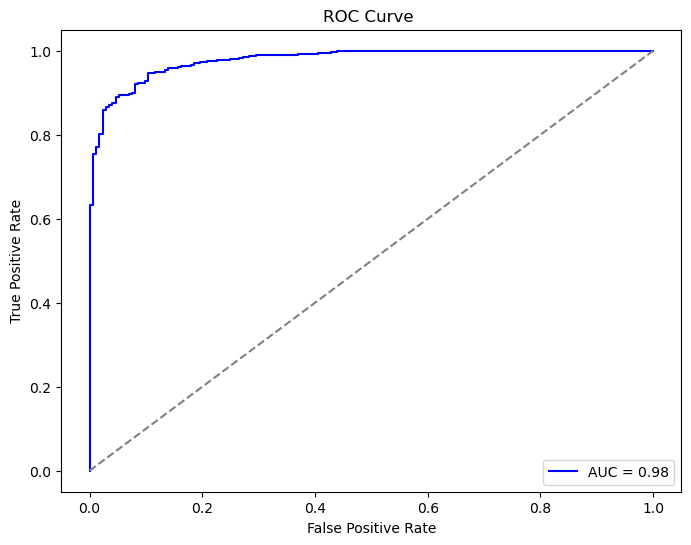

In [76]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_score = auc(fpr, tpr)
print(f"AUC : {auc_score:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve ")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
save_path = r"C:\Users\frida\OneDrive\Documents\1_2024 Fall\CEP512 Topical Seminar in reserach method\Final_project\ROC_Curve.png"
plt.savefig(save_path)

plt.show()

In [150]:
import statsmodels.api as sm
import pandas as pd

# Add a constant to X_train for statsmodels
X_train_sm = sm.add_constant(X_train)  # Adds a column named 'const' with value 1

# Fit the model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Extract coefficients and p-values into a DataFrame
coefficients = result.params  # Coefficients of the model
p_values = result.pvalues     # P-values of the coefficients

# Create a DataFrame with feature names, coefficients, and p-values
summary_df = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values,
    'P-value': p_values.values
})

# Add an Absolute Coefficient column to the DataFrame
summary_df['Absolute Coefficient'] = summary_df['Coefficient'].abs()

# Sort by Absolute Coefficient in ascending order
sorted_by_coef_df = summary_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the sorted DataFrame
print("\nSorted Feature Importance by Absolute Coefficient:")
print(sorted_by_coef_df)

# Print the summary to verify the output, which includes coefficients and p-values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.125470
         Iterations 10

Sorted Feature Importance by Absolute Coefficient:
                       Feature  Coefficient        P-value  \
10                  Attendance     4.097686  5.958370e-116   
0                        const     3.549398   1.168441e-14   
9                Hours_studied     3.113700  6.143334e-110   
6        Learning_disabilities    -1.873058   1.827002e-18   
2              Internet_access     1.810372   1.244516e-13   
12             Previous_scores     1.138211   1.106301e-43   
8           Distance_from_home    -0.965466   2.106977e-18   
7     Parental_education_level     0.929000   8.125106e-20   
3            Tutoring_sessions     0.892918   1.538337e-34   
4               Peer_influence     0.877357   1.015611e-18   
1   Extracurricular_activities     0.864941   4.438828e-09   
17         Access_to_resources    -0.695384   6.450147e-15   
15        Parental_involvement    -0.69